In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
import unicodedata
from textblob import TextBlob
import en_core_web_sm
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('/content/Sentiment Dataset Preprocessing.csv')
df.tail()

,text,sentiment
46149,coronavirusupdates state wise detail total con...,neutral
46150,tonight midnight onwards disaster management a...,negative
46151,new case covid nigeria plateau enugu oyo lagos...,negative
46152,rt cdcemergency dyk cdcgov one stop shop covid...,negative
46153,half pregnant woman recently admitted uk hospi...,negative


In [4]:
print(df.shape)

(46154, 2)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46154 entries, 0 to 46153
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46154 non-null  object
 1   sentiment  46154 non-null  object
dtypes: object(2)
memory usage: 721.3+ KB


In [6]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [9]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(46154, 2)
(46118, 2)


In [10]:
df[['text']]

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."
...,...
46149,coronavirusupdates state wise detail total con...
46150,tonight midnight onwards disaster management a...
46151,new case covid nigeria plateau enugu oyo lagos...
46152,rt cdcemergency dyk cdcgov one stop shop covid...


In [11]:
df['sentiment'].value_counts()

sentiment
negative    18915
neutral     14423
positive    12780
Name: count, dtype: int64

In [12]:
def _get_wordcounts(x):
	length = len(str(x).split())
	return length

def _get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

def _get_avg_wordlength(x):
	count = _get_charcounts(x)/_get_wordcounts(x)
	return count

def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l

def _get_hashtag_counts(x):
	l = len([t for t in x.split() if t.startswith('#')])
	return l

def _get_mentions_counts(x):
	l = len([t for t in x.split() if t.startswith('@')])
	return l

def _get_digit_counts(x):
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

def _get_uppercase_counts(x):
	return len([t for t in x.split() if t.isupper()])

In [13]:


def _remove_urls(x):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-*])?', '' , x)

def _remove_rt(x):
    return re.sub(r'\brt\b', '', x).strip()

def _remove_special_chars(x):
    x = re.sub(r'[^\w ]+', "", x)
    x = ' '.join(x.split())
    return x

def _remove_html_tags(x):
    return BeautifulSoup(x, 'lxml').get_text().strip()

def _remove_stopwords(x):
    return ' '.join([t for t in x.split() if t not in stopwords])




In [14]:
def _get_basic_features(df):
    if type(df) == pd.core.frame.DataFrame:
        df['char_counts'] = df['text'].apply(lambda x: _get_charcounts(x))
        df['word_counts'] = df['text'].apply(lambda x: _get_wordcounts(x))
        df['avg_wordlength'] = df['text'].apply(lambda x: _get_avg_wordlength(x))
        df['stopwords_counts'] = df['text'].apply(lambda x: _get_stopwords_counts(x))
        df['hashtag_counts'] = df['text'].apply(lambda x: _get_hashtag_counts(x))
        df['mentions_counts'] = df['text'].apply(lambda x: _get_mentions_counts(x))
        df['digits_counts'] = df['text'].apply(lambda x: _get_digit_counts(x))
        df['uppercase_counts'] = df['text'].apply(lambda x: _get_uppercase_counts(x))
    else:
        print('ERROR: This function takes only Pandas DataFrame')

    return df

In [15]:
df.columns

Index(['text', 'sentiment'], dtype='object')

In [16]:
df=_get_basic_features(df)

In [17]:
df.columns

Index(['text', 'sentiment', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [18]:
df.head()

,text,sentiment,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,"I`d have responded, if I were going",neutral,29,7,4.142857,3,0,0,1,1
1,Sooo SAD I will miss you here in San Diego!!!,negative,36,10,3.600000,3,0,0,0,2
2,my boss is bullying me...,negative,21,5,4.200000,2,0,0,1,0
3,what interview! leave me alone,negative,26,5,5.200000,2,0,0,0,0
4,"Sons of ****, why couldn`t they put them on t...",negative,61,14,4.357143,7,0,0,1,0


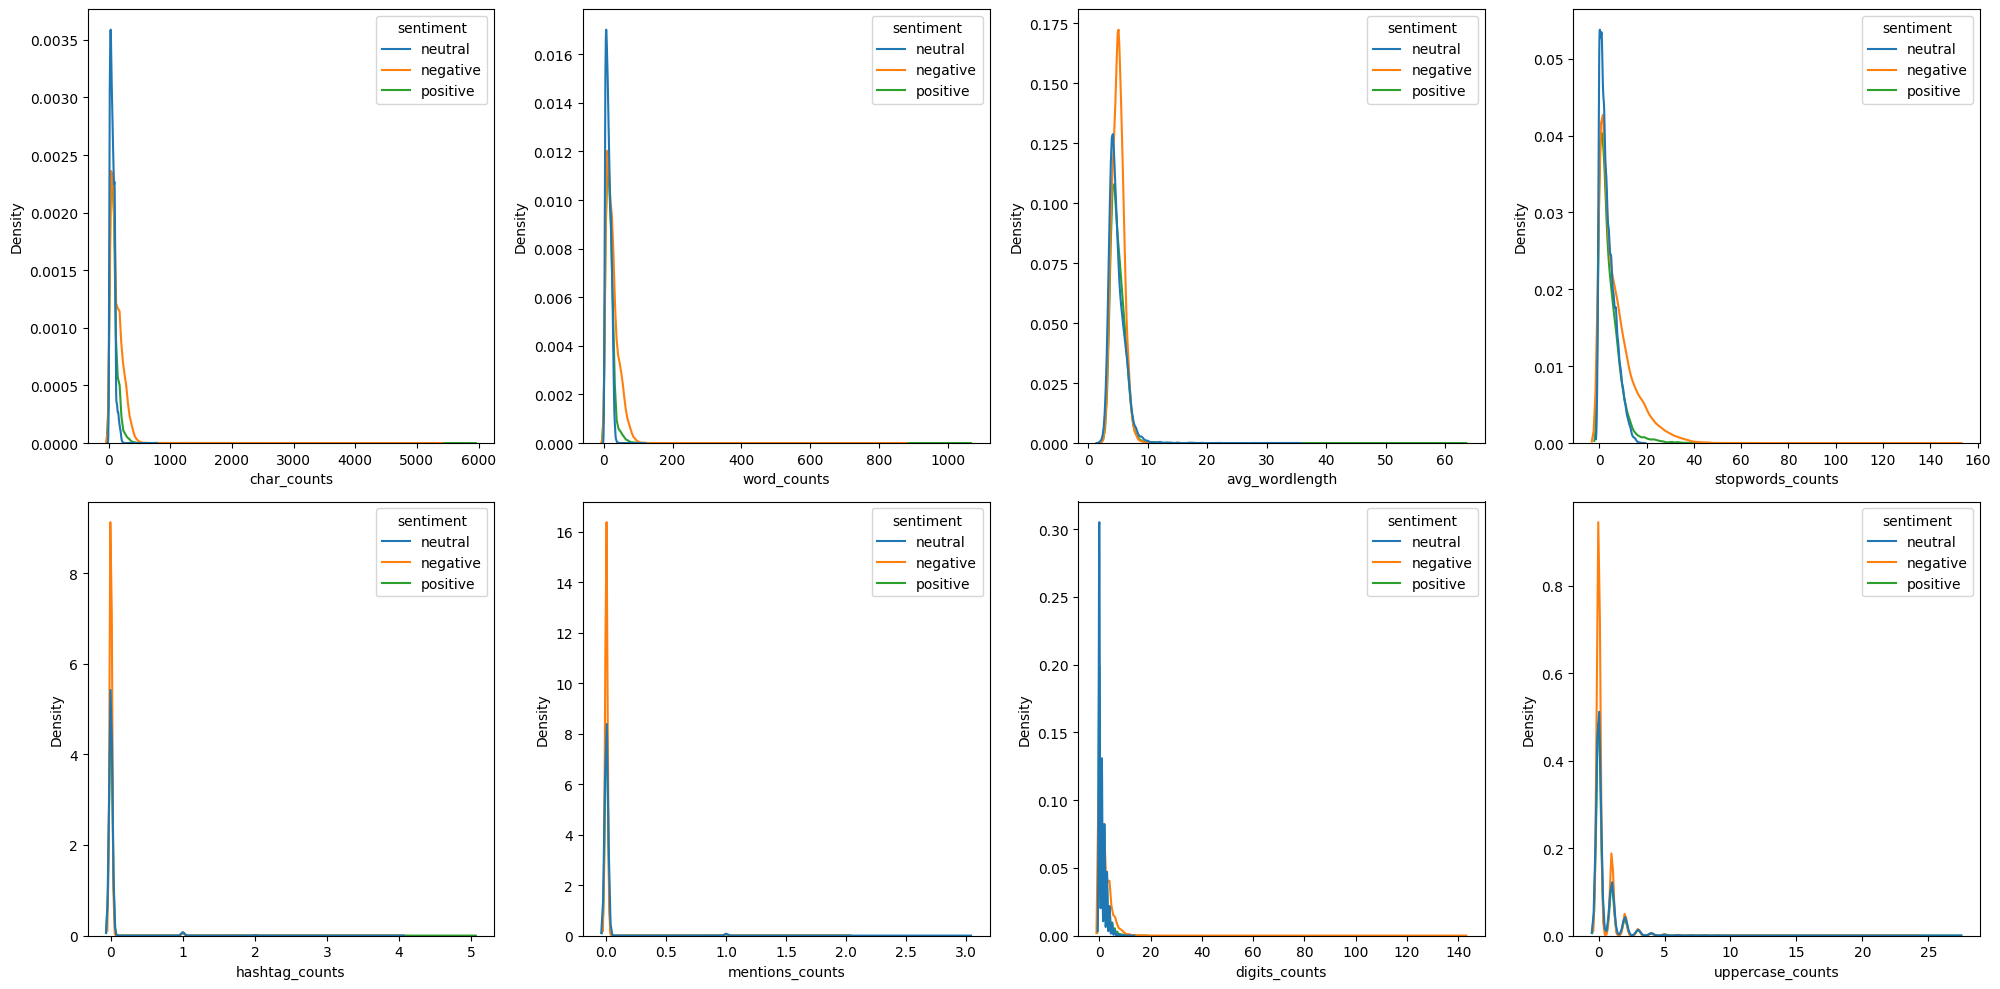

In [19]:
plt.figure(figsize=(20,10))

num_cols = df.select_dtypes(include='number').columns

for index,col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue='sentiment', fill=False)

plt.tight_layout()
plt.show()

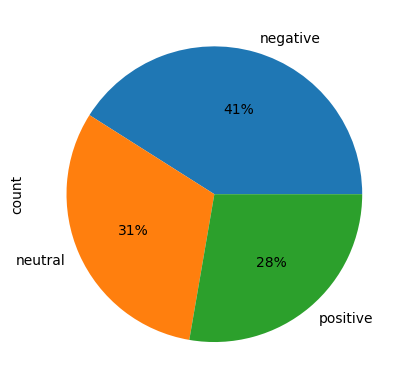

In [20]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

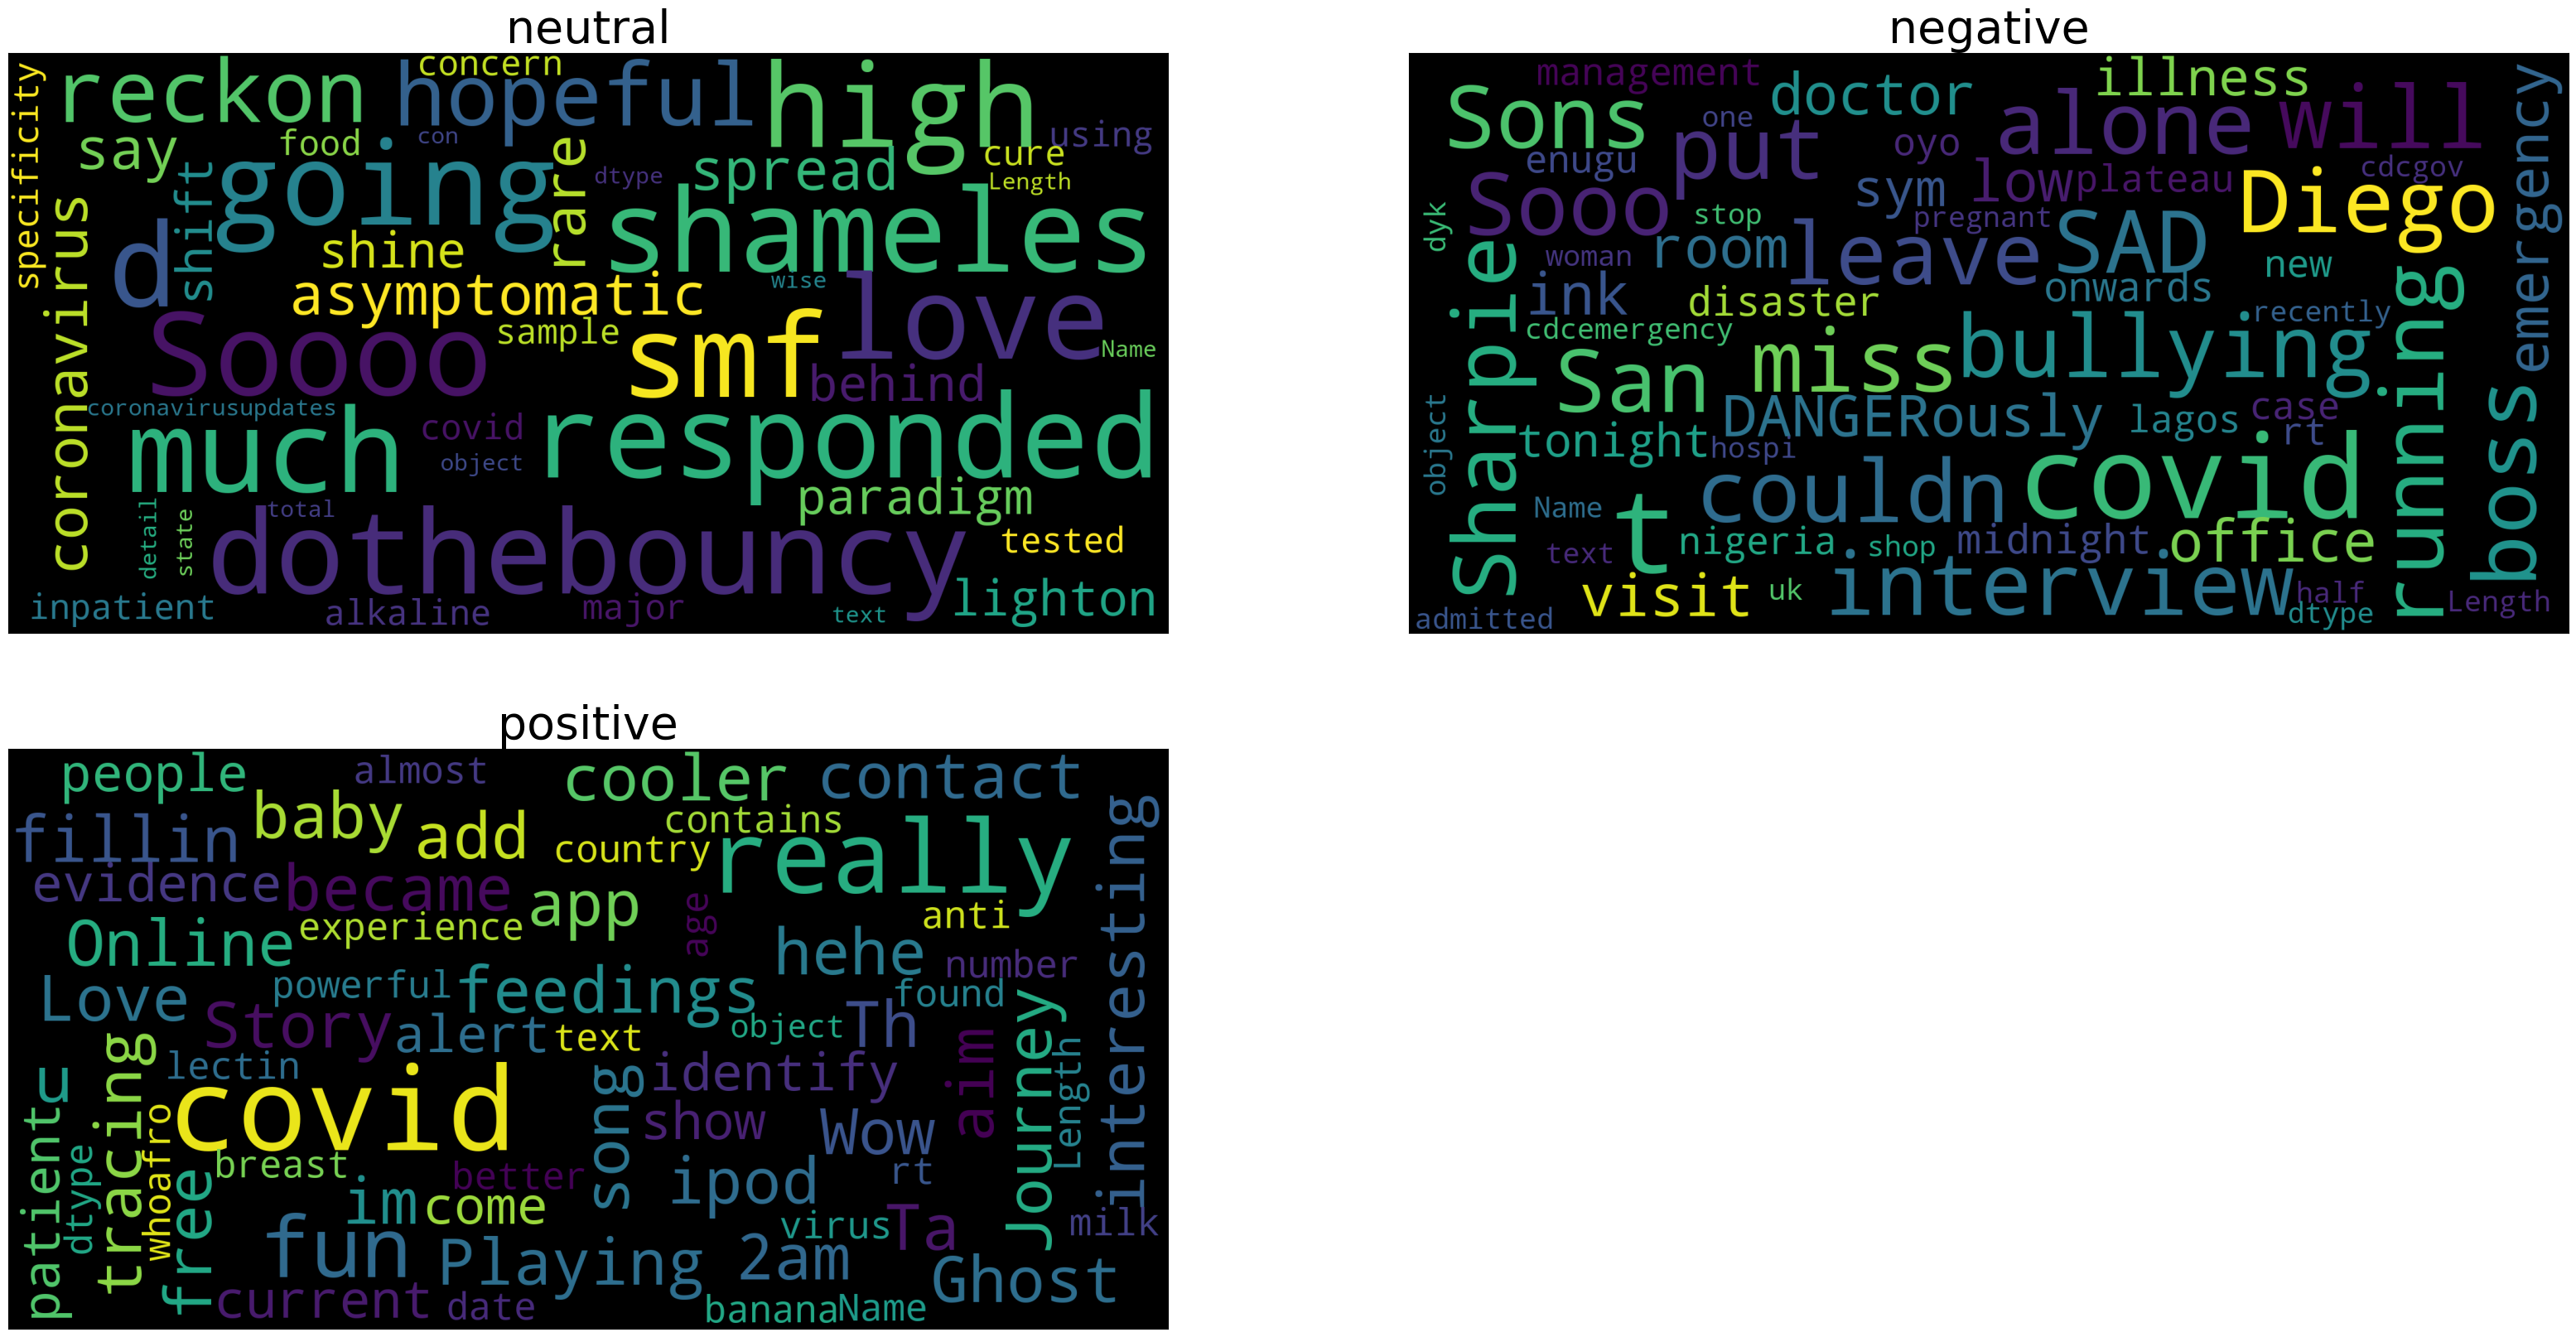

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(40,20))

for index, col in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    df1 = df[df['sentiment']==col]
    data = df1['text']
    wordcloud = WordCloud(background_color='black', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)

plt.show()
plt.tight_layout()

In [22]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: _remove_urls(x))
df['text'] = df['text'].apply(lambda x: _remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: _remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: _remove_rt(x))

In [23]:
# Define the mapping from sentiment labels to numerical values
sentiment_mapping = {'negative': 0, 'positive': 1, 'neutral': 2}

# Add a new column with the numerical sentiment values
df['sentiment_numeric'] = df['sentiment'].map(sentiment_mapping)

print(df)

                                                    text sentiment  \
0                      id have responded if i were going   neutral   
1             sooo sad i will miss you here in san diego  negative   
2                                 my boss is bullying me  negative   
3                          what interview leave me alone  negative   
4      sons of why couldnt they put them on the relea...  negative   
...                                                  ...       ...   
46149  coronavirusupdates state wise detail total con...   neutral   
46150  tonight midnight onwards disaster management a...  negative   
46151  new case covid nigeria plateau enugu oyo lagos...  negative   
46152  cdcemergency dyk cdcgov one stop shop covid re...  negative   
46153  half pregnant woman recently admitted uk hospi...  negative   

       char_counts  word_counts  avg_wordlength  stopwords_counts  \
0               29            7        4.142857                 3   
1               36   

# Sentiment Detection With Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment_numeric'], test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((36894,), (9224,))

In [26]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.pipeline import Pipeline

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the pipeline
clf = Pipeline([
    ('countvec', CountVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000, n_jobs=-1))
])

In [28]:
clf.fit(X_train, y_train)

Pipeline(steps=[('countvec', CountVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000, n_jobs=-1))])

In [29]:
#clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
#clf.fit(X_train, y_train)

In [30]:
import pickle
from sklearn.pipeline import Pipeline

In [31]:
# Save the pipeline and CountVectorizer to a pickle file
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(clf, file)

#Sentiment Detection With LSTM

In [32]:
from sklearn.metrics import classification_report

y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      3792
           1       0.75      0.69      0.72      2520
           2       0.66      0.74      0.70      2912

    accuracy                           0.74      9224
   macro avg       0.74      0.73      0.73      9224
weighted avg       0.74      0.74      0.74      9224



In [33]:
clf.predict(["imran khan put in adiala jail"])

array([2])

In [34]:
clf.predict(["In the last five years, 28,000 people have been killed along the U.S.-Mexico border.crime homeland security immigration in the last five years 28 000 people have been killed along the u s mexico border 150 congressman republican "])

array([0])

In [35]:
clf.predict(["I AM SUCH A CREEPER  I feel disappointed because of it. **** my cyberstalking skills   the internet = no more privacy."])

array([0])

In [36]:
clf.predict(['sir asim is the best teacher in ubit'])

array([1])

In [37]:
clf.predict(["She took a breezy attitude to religious sentiment."])

array([2])

In [38]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [39]:
# Parameters
max_words = 10000  # Maximum number of words to consider in the tokenizer
max_len = 100      # Maximum length of the input sequences
embedding_dim = 100  # Dimension of the embedding vectors

In [40]:
#Text preprocessing
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [41]:
# Label encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['sentiment'])

In [42]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.3, random_state=0)

In [43]:
# Model building
model = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [44]:
# Model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
# Model training
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/15
1009/1009 [==============================] - 67s 56ms/step - loss: 0.7409 - accuracy: 0.6685 - val_loss: 0.5981 - val_accuracy: 0.7590
Epoch 2/15
1009/1009 [==============================] - 28s 28ms/step - loss: 0.5090 - accuracy: 0.7970 - val_loss: 0.5794 - val_accuracy: 0.7736
Epoch 3/15
1009/1009 [==============================] - 29s 29ms/step - loss: 0.4059 - accuracy: 0.8395 - val_loss: 0.6270 - val_accuracy: 0.7595
Epoch 4/15
1009/1009 [==============================] - 27s 27ms/step - loss: 0.3283 - accuracy: 0.8757 - val_loss: 0.6535 - val_accuracy: 0.7528
Epoch 5/15
1009/1009 [==============================] - 27s 26ms/step - loss: 0.2667 - accuracy: 0.8997 - val_loss: 0.7706 - val_accuracy: 0.7496
Epoch 6/15
1009/1009 [==============================] - 26s 26ms/step - loss: 0.2192 - accuracy: 0.9187 - val_loss: 0.8706 - val_accuracy: 0.7425
Epoch 7/15
1009/1009 [==============================] - 27s 27ms/step - loss: 0.1821 - accuracy: 0.9331 - val_loss: 0.9700 -

In [46]:
model.evaluate(X_train,y_train)

1009/1009 [==============================] - 10s 10ms/step - loss: 0.0432 - accuracy: 0.9865


[0.04324307665228844, 0.9865249991416931]

In [47]:
model.evaluate(X_test,y_test)

433/433 [==============================] - 4s 9ms/step - loss: 1.4536 - accuracy: 0.7186


[1.4536460638046265, 0.7186325788497925]

In [48]:
# Save your model
model.save('sentimentLSTM.h5')